### import

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
import numpy as np
import seaborn as sns
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 베이스에 연결

In [ ]:
# connect_database 함수 정의
def connect_database(host_name="host_name", user_name="user_name", user_password="user_password"):
    mydb = mysql.connector.connect(
        host=host_name,
        port=3306,
        user=user_name,
        password=user_password,
        database="WAY_BACK_HOME"
    )
    cursor = mydb.cursor()
    return mydb, cursor

# 데이터베이스 연결
mydb, cursor = connect_database()

### 데이터베이스 연결 해제 코드

In [ ]:
# 연결 해제하는 코드
cursor.close()  # 커서 닫기
mydb.close()    # 데이터베이스 연결 닫기

### 데이터베이스에서 필요한 df를 함수로 가져오는 코드

In [8]:
# 데이터베이스에서 필요한 데이터 가져오는 함수
def fetch_data(query, cursor):
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [i[0] for i in cursor.description]
    df = pd.DataFrame(result, columns=columns)
    return df

### housingsupply 가구수 서울 (2005 ~ 2022)

          date  households_count
0   2005-01-01            3309.9
1   2006-01-01            3349.7
2   2007-01-01            3403.2
3   2008-01-01            3453.6
4   2009-01-01            3500.9
5   2010-01-01            3646.5
6   2011-01-01            3673.4
7   2012-01-01            3700.6
8   2013-01-01            3728.2
9   2014-01-01            3756.2
10  2015-01-01            3784.5
11  2016-01-01            3784.7
12  2017-01-01            3813.3
13  2018-01-01            3839.8
14  2019-01-01            3896.4
15  2020-01-01            3982.3
16  2021-01-01            4046.8
17  2022-01-01            4098.8


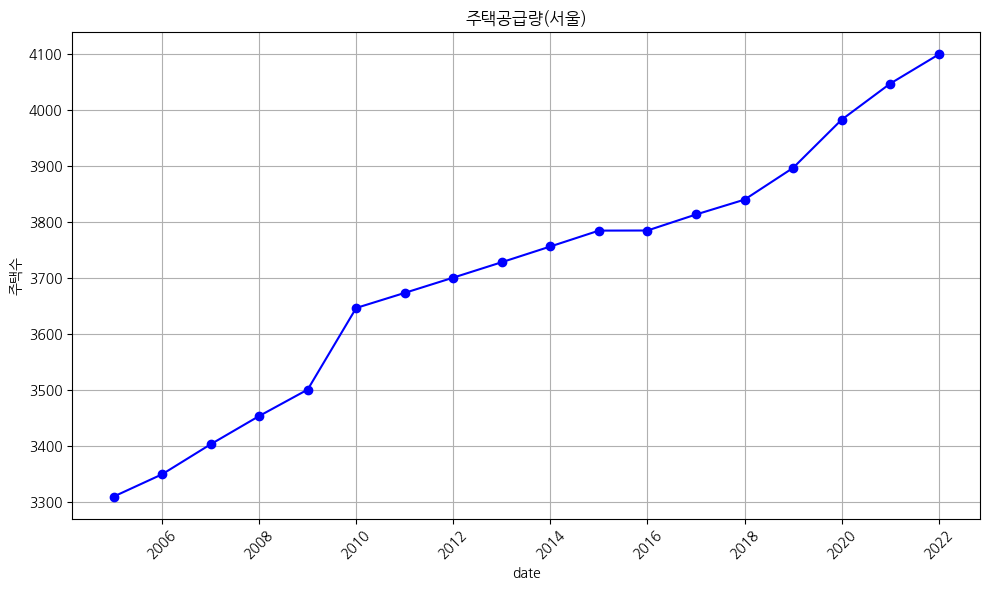

In [9]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_households_count= """
SELECT date, households_count 
FROM housing_supply  
WHERE region_id LIKE '19'
"""
df_housing_supply_households_count = fetch_data(query_housing_supply_households_count, cursor)

# 데이터 확인
print(df_housing_supply_households_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_households_count['date'], df_housing_supply_households_count['households_count'], marker='o', linestyle='-', color='b')
plt.title('주택공급량(서울)')
plt.xlabel('date') #x축
plt.ylabel('가구수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### hosuingsupply 주택수 서울 (2005 ~ 2022)

          date  housing_count
0   2005-01-01         3102.2
1   2006-01-01         3151.1
2   2007-01-01         3172.3
3   2008-01-01         3231.7
4   2009-01-01         3258.4
5   2010-01-01         3442.1
6   2011-01-01         3477.8
7   2012-01-01         3509.8
8   2013-01-01         3546.4
9   2014-01-01         3607.6
10  2015-01-01         3633.0
11  2016-01-01         3644.1
12  2017-01-01         3671.5
13  2018-01-01         3682.4
14  2019-01-01         3738.6
15  2020-01-01         3778.4
16  2021-01-01         3811.9
17  2022-01-01         3839.8


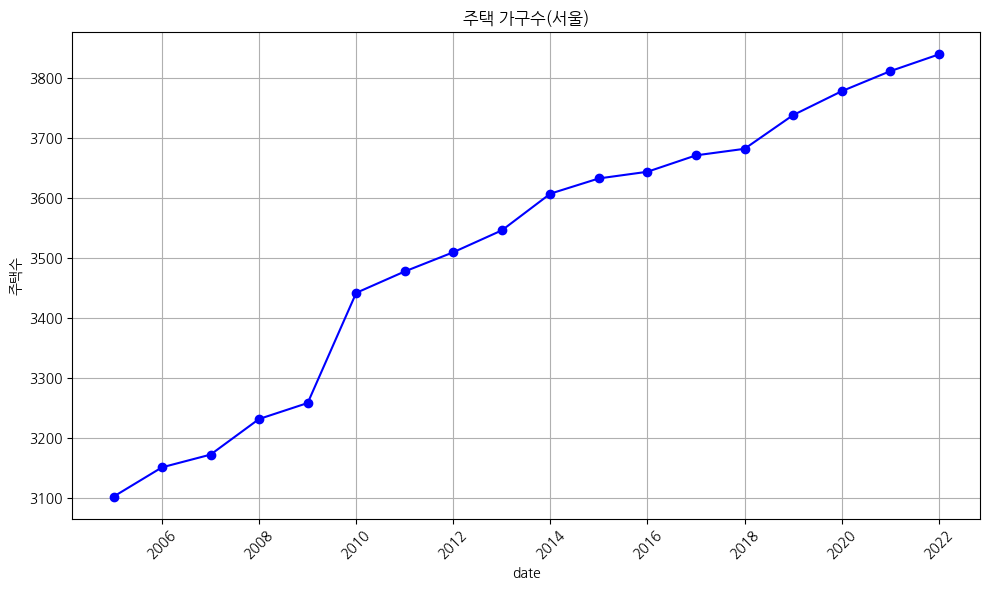

In [10]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_housing_count= """
SELECT date, housing_count
FROM housing_supply  
WHERE region_id LIKE '19'
"""
df_housing_supply_housing_count = fetch_data(query_housing_supply_housing_count, cursor)

# 데이터 확인
print(df_housing_supply_housing_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_housing_count['date'], df_housing_supply_housing_count['housing_count'], marker='o', linestyle='-', color='b')
plt.title('주택 주택수(서울)')
plt.xlabel('date') #x축
plt.ylabel('주택수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### housing_supply 공급률 서울 (2005 ~ 2022)

          date  penetration_rate
0   2005-01-01              93.7
1   2006-01-01              94.1
2   2007-01-01              93.2
3   2008-01-01              93.6
4   2009-01-01              93.1
5   2010-01-01              94.4
6   2011-01-01              94.7
7   2012-01-01              94.8
8   2013-01-01              95.1
9   2014-01-01              96.0
10  2015-01-01              96.0
11  2016-01-01              96.3
12  2017-01-01              96.3
13  2018-01-01              95.9
14  2019-01-01              96.0
15  2020-01-01              94.9
16  2021-01-01              94.2
17  2022-01-01              93.7


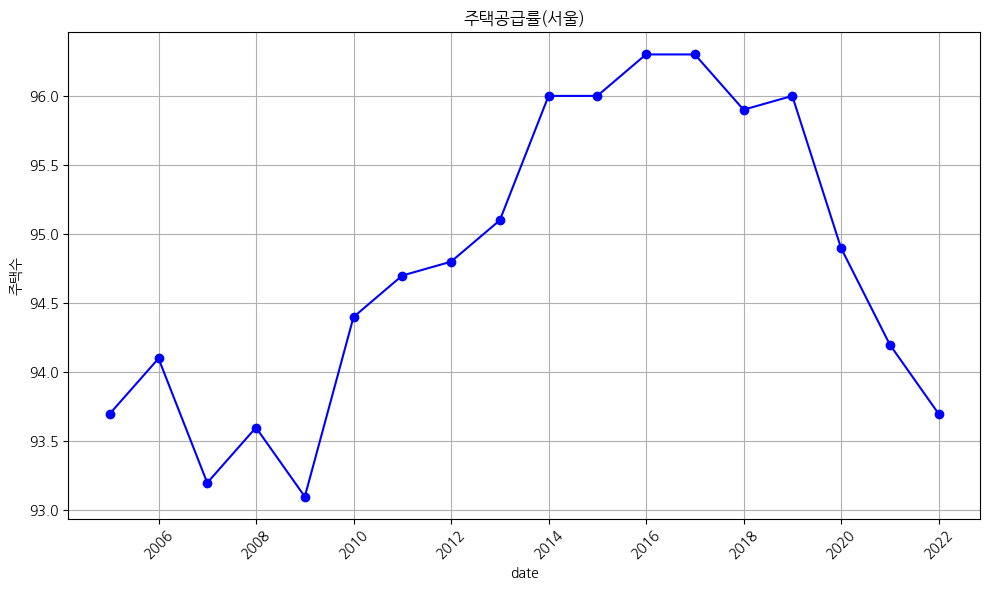

In [11]:
# 쿼리 실행 여기를 수정하면 된다. 19는 서울
query_housing_supply_penetration_rate= """
SELECT date, penetration_rate
FROM housing_supply  
WHERE region_id LIKE '19'
"""
df_housing_supply_penetration_rate = fetch_data(query_housing_supply_penetration_rate, cursor)

# 데이터 확인
print(df_housing_supply_penetration_rate)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_housing_supply_penetration_rate['date'], df_housing_supply_penetration_rate['penetration_rate'], marker='o', linestyle='-', color='b')
plt.title('주택공급률(서울)')
plt.xlabel('date') #x축
plt.ylabel('주택수') #y축
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 전세가격지수 매매가격지수 겹쳐서 출력
### jeonse_price_index and property_price_index (2003.11 ~ 2024.08)

           date  price_index
0    2003-11-01         52.5
1    2003-12-01         52.1
2    2004-01-01         51.9
3    2004-02-01         52.2
4    2004-03-01         52.5
..          ...          ...
245  2024-04-01         94.0
246  2024-05-01         94.2
247  2024-06-01         94.8
248  2024-07-01         95.9
249  2024-08-01         97.1

[250 rows x 2 columns]
           date  price_index
0    2003-11-01         46.7
1    2003-12-01         46.2
2    2004-01-01         46.0
3    2004-02-01         46.3
4    2004-03-01         46.5
..          ...          ...
245  2024-04-01         87.6
246  2024-05-01         87.9
247  2024-06-01         88.5
248  2024-07-01         89.2
249  2024-08-01         90.0

[250 rows x 2 columns]


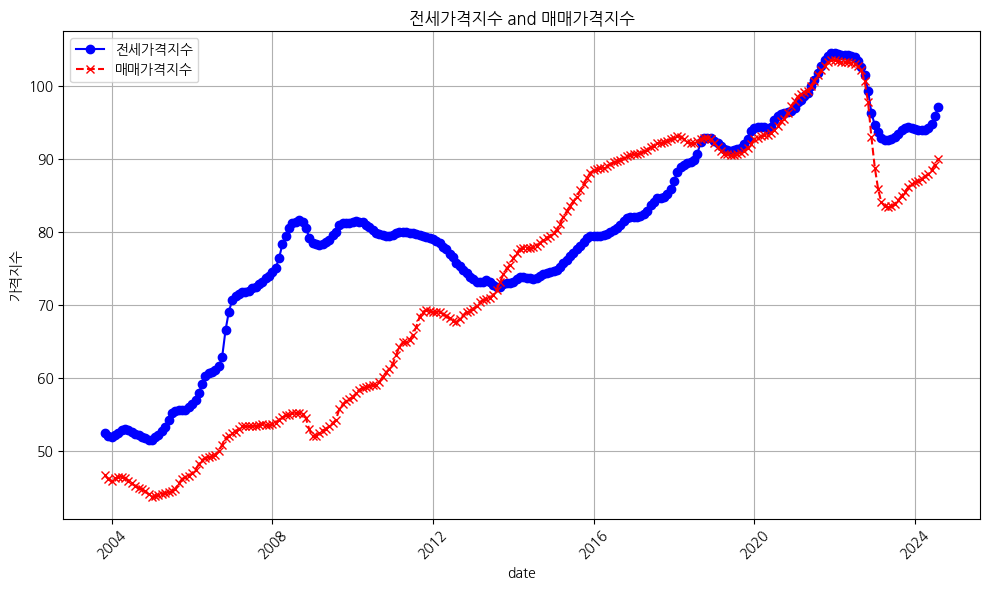

In [12]:
# 전세가격지수 데이터 쿼리
query_jeonse = """
SELECT date, price_index 
FROM jeonse_price_index
WHERE region_id LIKE '19'
"""
df_jeonse = fetch_data(query_jeonse, cursor)

# 매매가격지수 데이터 쿼리
query_maemae = """
SELECT date, price_index 
FROM property_price_index
WHERE region_id LIKE '19'
"""
df_maemae = fetch_data(query_maemae, cursor)

# 데이터 확인
print(df_jeonse)
print(df_maemae)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가격지수 플롯
plt.plot(df_jeonse['date'], df_jeonse['price_index'], marker='o', linestyle='-', color='b', label='전세가격지수')

# 매매가격지수 플롯
plt.plot(df_maemae['date'], df_maemae['price_index'], marker='x', linestyle='--', color='r', label='매매가격지수')

# 그래프 설정
plt.title('전세가격지수 and 매매가격지수')
plt.xlabel('date')
plt.ylabel('가격지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 전세가율 2012~2024

In [ ]:
# 전세가율 쿼리
query_jeonse_ratio = """
SELECT date, ratio
FROM property_jeonse_ratio_copy
WHERE region_id LIKE '19'
"""
df_jeonse_ratio = fetch_data(query_jeonse_ratio, cursor)

# 데이터 확인
print(df_jeonse_ratio)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_jeonse_ratio['date'], df_jeonse_ratio['ratio'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('전세가격지수 vs 매매가격지수')
plt.xlabel('date')
plt.ylabel('전세가율')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 전세가격지수 매매가격지수 2012년부터 그리기 

In [ ]:
# 전세가격지수 데이터 쿼리
query_jeonse_2012 = """
SELECT date, price_index 
FROM jeonse_price_index
WHERE region_id LIKE '19' and date >= '2012-01-01';
"""
df_jeonse_2012 = fetch_data(query_jeonse_2012, cursor)

# 매매가격지수 데이터 쿼리
query_maemae_2012 = """
SELECT date, price_index 
FROM property_price_index
WHERE region_id LIKE '19' and date >= '2012-01-01'
"""
df_maemae_2012 = fetch_data(query_maemae_2012, cursor)

# 데이터 확인
print(df_jeonse_2012)
print(df_maemae_2012)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가격지수 플롯
plt.plot(df_jeonse_2012['date'], df_jeonse_2012['price_index'], marker='o', linestyle='-', color='b', label='전세가격지수')

# 매매가격지수 플롯
plt.plot(df_maemae_2012['date'], df_maemae_2012['price_index'], marker='x', linestyle='--', color='r', label='매매가격지수')

# 그래프 설정
plt.title('전세가격지수 vs 매매가격지수')
plt.xlabel('date')
plt.ylabel('가격지수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 년도별 뉴스 갯수 2013~2024

In [ ]:
# 뉴스 쿼리  # 8월 데이터가 튀는거같다.
query_news = """
SELECT date, count(date) as count
FROM news_titles_copy
where date
GROUP BY date
"""
df_news = fetch_data(query_news, cursor)

# 데이터 확인
print(df_news)
# 데이터 형식 확인 (필요한 경우)
df_news['date'] = pd.to_datetime(df_news['date'])

plt.figure(figsize=(12, 6))
plt.plot(df_news['date'], df_news['count'], marker='o', linestyle='-', color='b', label='뉴스갯수')
plt.title('월별 뉴스 갯수')
plt.xlabel('날짜')
plt.ylabel('뉴스갯수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 전월세 전환율 2011년부터 2024년7월까지 

In [ ]:
# 전월세전환율
query_rent_conversion_rate = """
SELECT date, conversion_rate
FROM rent_conversion_rate
WHERE region_id LIKE '19'
"""
df_rent_conversion_rate  = fetch_data(query_rent_conversion_rate , cursor)

# 데이터 확인
print(df_rent_conversion_rate )

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_rent_conversion_rate ['date'], df_rent_conversion_rate ['conversion_rate'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('전월세 전환율(서울)')
plt.xlabel('date')
plt.ylabel('전월세 전환율')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

### 미분양 물량 갯수 

In [ ]:
# 미분양
query_unsold_status = """
SELECT date, unsold_sum
FROM unsold_status 
WHERE region_id LIKE '19'
"""
df_unsold_status   = fetch_data(query_unsold_status  , cursor)

# 데이터 확인
print(df_unsold_status)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_unsold_status  ['date'], df_unsold_status ['unsold_sum'], marker='o', linestyle='-', color='b', label='전세가율')

# 그래프 설정
plt.title('미분양 갯수(서울)')
plt.xlabel('date')
plt.ylabel('미분양')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

### 대출금 총액 2006 ~ 2023

In [ ]:
# 대출 금액 총액
query_loan_interest = """
SELECT date, loan_sum
FROM loan_interest
WHERE region_id LIKE '19'
"""
df_loan_interest  = fetch_data(query_loan_interest  , cursor)

# 데이터 확인
print(df_loan_interest)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 전세가율 
plt.plot(df_loan_interest['date'], df_loan_interest['loan_sum'], marker='o', linestyle='-', color='b', label='대출금액총액')

# 그래프 설정
plt.title('대출금액총액(서울)')
plt.xlabel('date')
plt.ylabel('대출금액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()
# 그래프 보여주기
plt.show()

### 대출금리 2006~2023

In [ ]:
# 대출 금리
query_base_interest = """
SELECT date, AVG(interest) AS interest FROM base_interest_copy
GROUP BY date
"""
df_base_interest = fetch_data(query_base_interest, cursor)

# 데이터 확인
print(df_base_interest)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_base_interest['date'], df_base_interest['interest'], marker='o', linestyle='-', color='b', label='대출 금리')

# 그래프 설정
plt.title('대출 금리')
plt.xlabel('date')
plt.ylabel('대출 금리')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 신혼부부 어떻게 뽑아와야하지? 그룹바이를 해서 년 별로 출력할까?

    year  month number
0   2012      1  85337
1   2013      1  82420
2   2014      1  77375
3   2015      1  76738
4   2016      1  69859
5   2017      1  65168
6   2018      1  62972
7   2019      1  58141
8   2020      1  53086
9   2021      1  44299
10  2022      1  43249
11  2023      1  44474


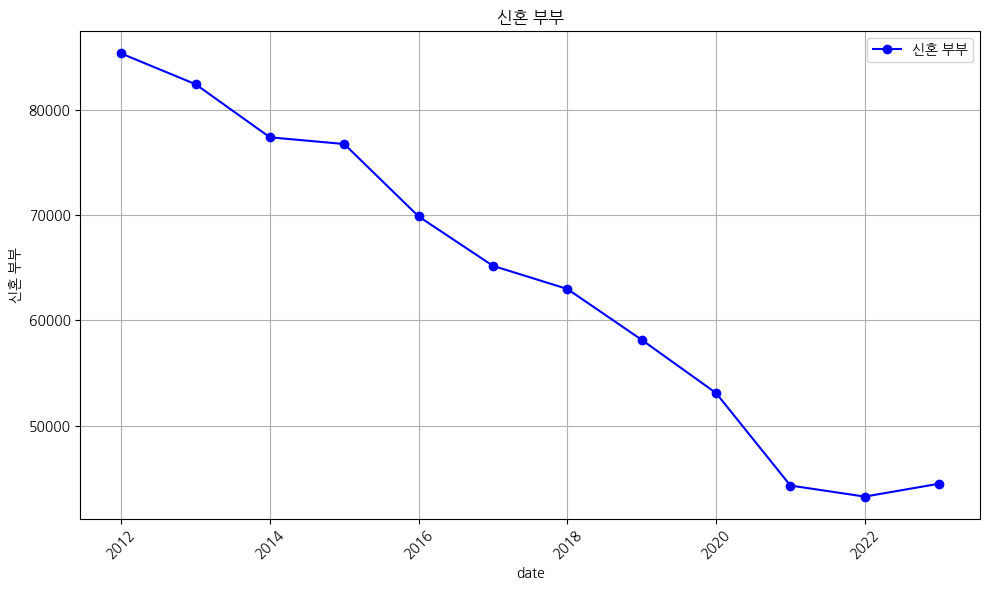

In [16]:
# 신혼부부 marriages
query_marriages = """
SELECT year,month,sum(number)as number 
from marriages
where year >= 2012
group by year
"""
df_marriages = fetch_data(query_marriages, cursor)

# 데이터 확인
print(df_marriages)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_marriages['year'], df_marriages['number'], marker='o', linestyle='-', color='b', label='신혼 부부')

# 그래프 설정
plt.title('신혼 부부')
plt.xlabel('date')
plt.ylabel('신혼 부부')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 주택 멸실지수

    year  loss_count
0   2012        2243
1   2013        1755
2   2014        3837
3   2015        1791
4   2016       10573
5   2017       14738
6   2018        7306
7   2019       12481
8   2020        9329
9   2021        7488
10  2022        1210


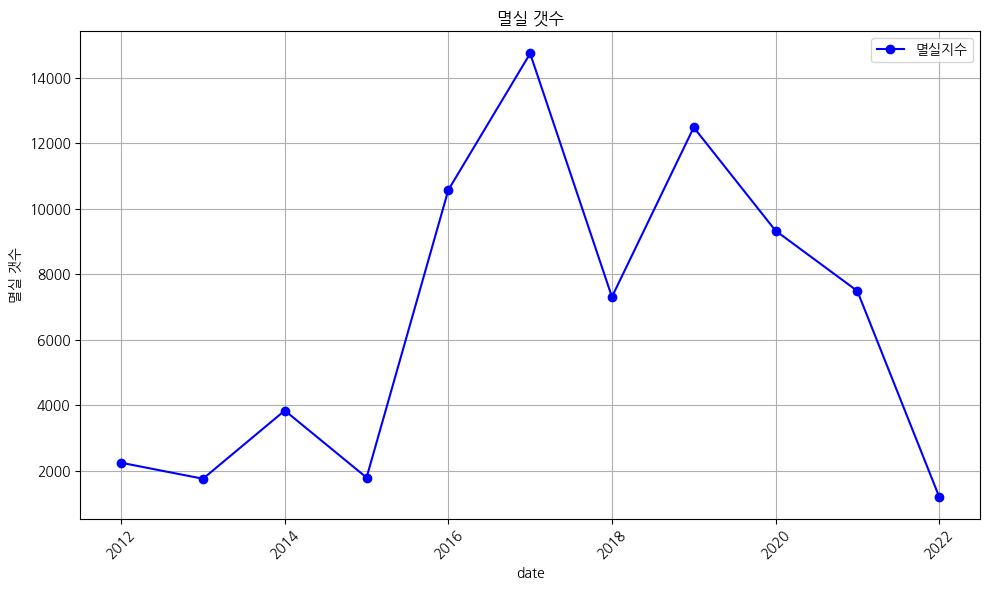

In [19]:
# 멸실지수
query_loss_housing = """
SELECT year, loss_count 
FROM loss_housing
where region_id = 19 and year >= 2012
"""
df_loss_housing = fetch_data(query_loss_housing, cursor)

# 데이터 확인
print(df_loss_housing)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 대출 금리 
plt.plot(df_loss_housing['year'], df_loss_housing['loss_count'], marker='o', linestyle='-', color='b', label='멸실지수')

# 그래프 설정
plt.title('멸실 갯수')
plt.xlabel('date')
plt.ylabel('멸실 갯수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # 범례 추가
plt.tight_layout()

# 그래프 보여주기
plt.show()